# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [2]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn
from sklearn import metrics

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [4]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

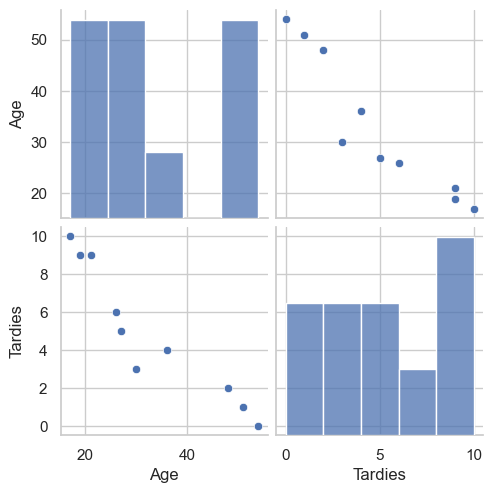

In [11]:
sns.pairplot(student_data);

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

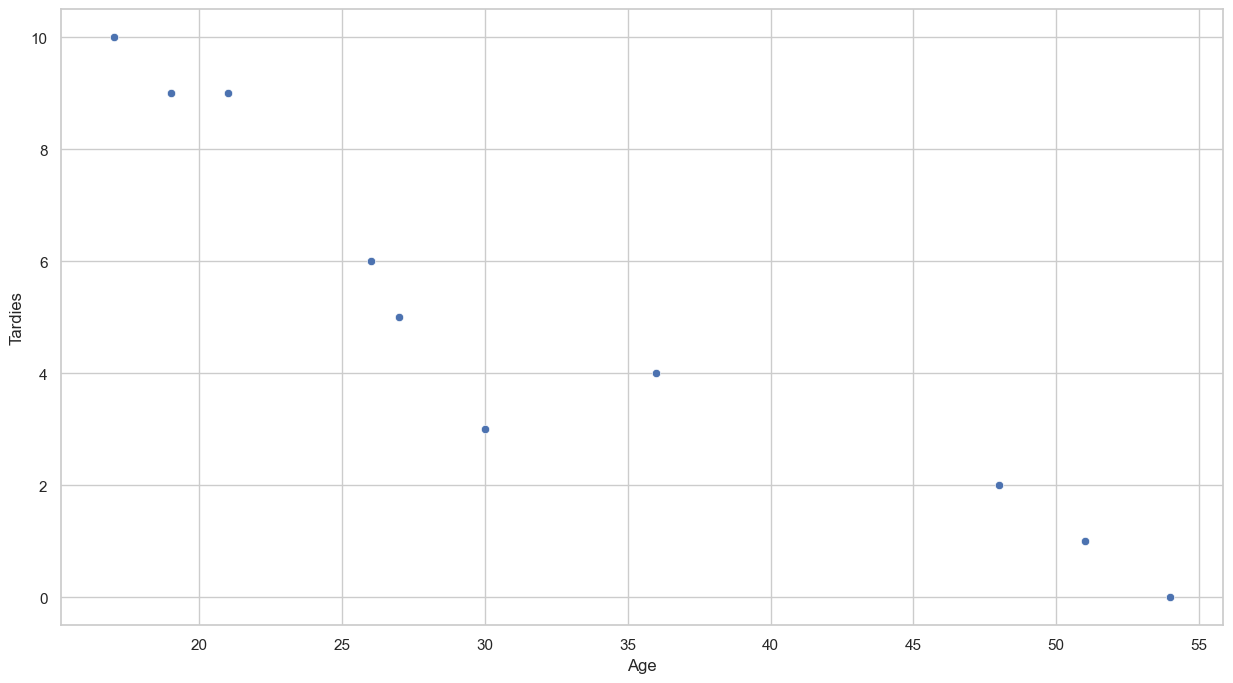

In [6]:
# Your code here.
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [18]:
# Your response here. 

#The older you are, the less posssible it is for you to be late for class.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [19]:
# Your response here.
student_data.corr()

,Age,Tardies,prediction_1
Age,1.000000,-0.939163,-1.000000
Tardies,-0.939163,1.000000,0.939163
prediction_1,-1.000000,0.939163,1.000000


In [74]:
cov_matrix = np.cov(student_data,bias=True)
cov_matrix

array([[ 13.15767562,  85.18330841,  35.84778991,  21.59362686,
         54.02856211,  78.69632136,  17.69569848,  33.25873124,
         91.67029546,  42.97487143],
       [ 85.18330841, 561.11063957, 238.10440426, 140.85119741,
        356.48146783, 517.98458549, 115.76752758, 220.06202   ,
        604.23669366, 286.73100768],
       [ 35.84778991, 238.10440426, 101.43506669,  59.49018478,
        151.38981036, 219.72447914,  48.96524526,  93.58008109,
        256.48432937, 122.40750764],
       [ 21.59362686, 140.85119741,  59.49018478,  35.55340923,
         89.40114412, 130.08165043,  29.17293844,  55.10110859,
        151.62074439,  71.45857255],
       [ 54.02856211, 356.48146783, 151.38981036,  89.40114412,
        226.51322326, 329.059052  ,  73.50081176, 139.86772689,
        383.90388366, 182.38414348],
       [ 78.69632136, 517.98458549, 219.72447914, 130.08165043,
        329.059052  , 478.18910518, 106.90195292, 203.10869634,
        557.7800658 , 264.54589349],
       [ 1

In [20]:
pd.DataFrame(np.cov(student_data["Age"],student_data["Tardies"]))

,0,1
0,187.655556,-45.566667
1,-45.566667,12.544444


# they have similitudes but the covariance is not as big as correlation, so the variation is smaller that the trend.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [21]:
# Your response here.
X= student_data[["Age"]]
y=student_data["Tardies"]

In [22]:
# Instantiate
lr_1 = LinearRegression()

In [23]:
# Training
lr_1.fit(X, y)

LinearRegression()

In [24]:
student_data["prediction_1"] = lr_1.predict(X)

In [25]:
student_data

,Age,Tardies,prediction_1
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


In [26]:
## I check metrics to if we are dealing with a good model
mae = metrics.mean_absolute_error(student_data.Tardies, student_data.prediction_1)
print(f"MAE ={mae}")
mse = metrics.mean_squared_error(student_data.Tardies, student_data.prediction_1)
print(f"MSE ={mse}")
rmse = np.sqrt(metrics.mean_squared_error(student_data.Tardies, student_data.prediction_1))
print(f"RMSE ={rmse}")
r2 = metrics.r2_score(student_data.Tardies, student_data.prediction_1)
print(f"r2 ={r2}")

MAE =0.9319083427082718
MSE =1.3319201847356268
RMSE =1.1540884648655088
r2 =0.8820265558250109


In [27]:
results = smf.ols("Tardies ~ Age", data=student_data).fit()

In [28]:
results.summary()

/Users/bernat/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           5.57e-05
Time:                        15:30:31   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

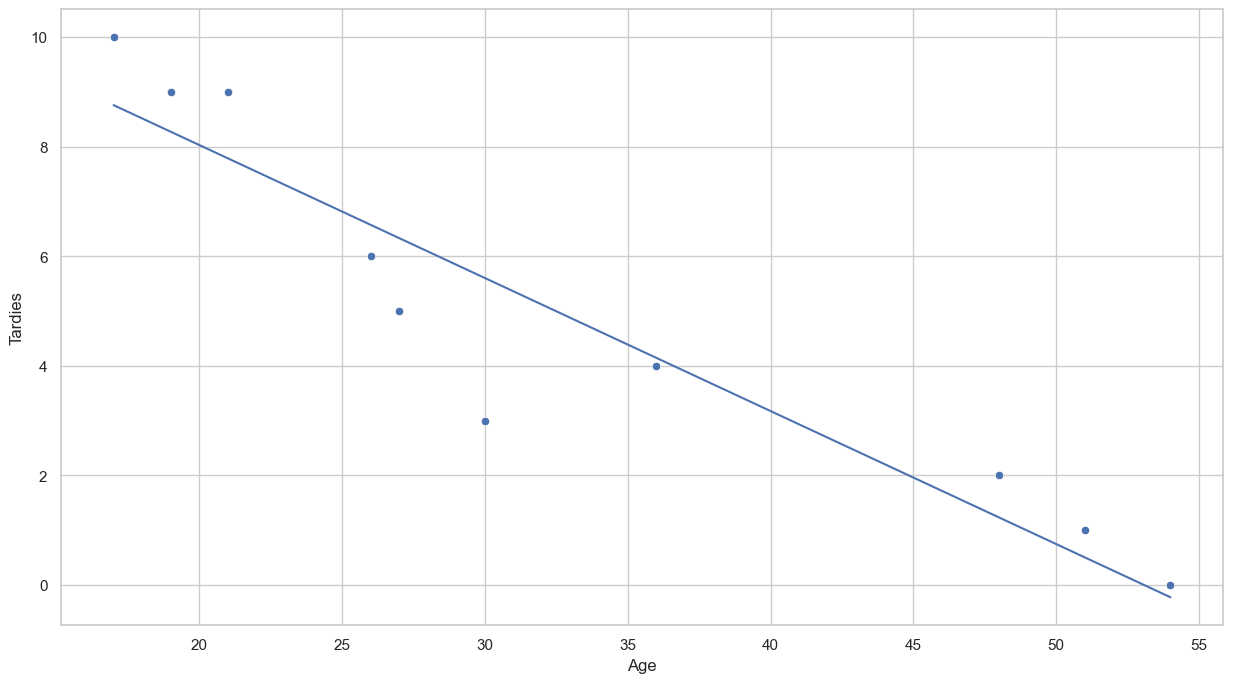

In [76]:
# Your code here.
# Your code here.
sns.scatterplot(x="Age", y="Tardies", data=student_data)
sns.lineplot(x="Age", y= "prediction_1", data= student_data)


<AxesSubplot:xlabel='Age', ylabel='Tardies'>

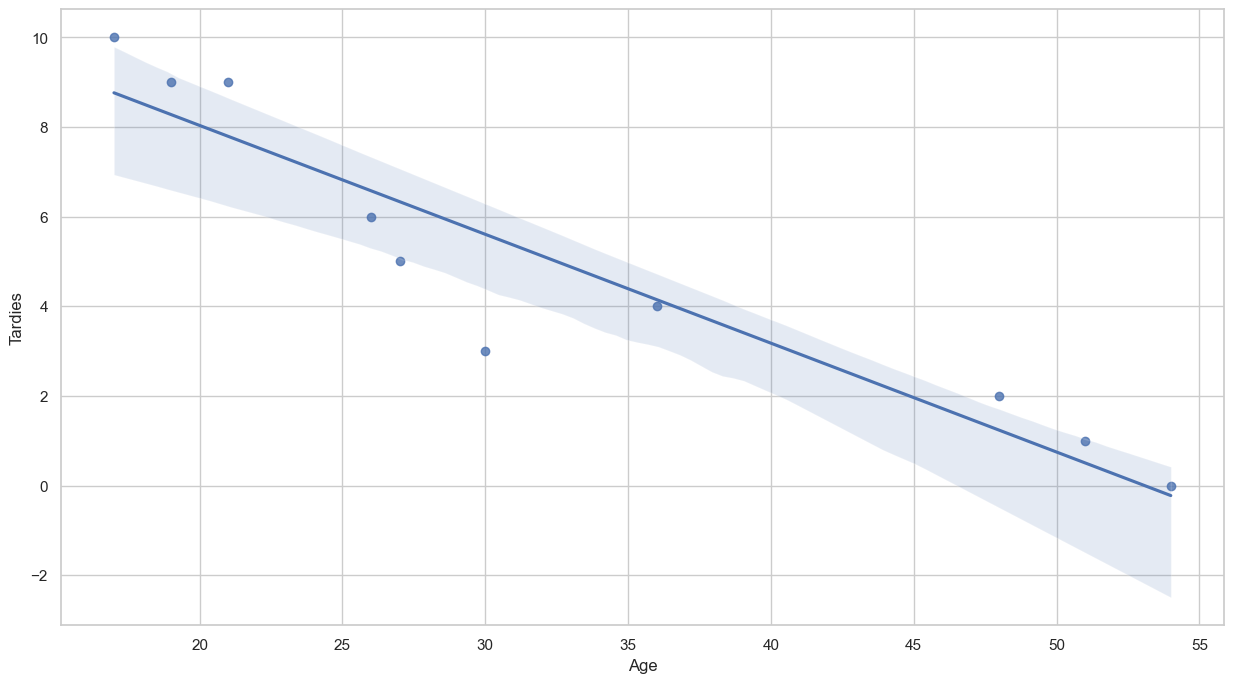

In [77]:
sns.regplot(x="Age", y="Tardies", data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
# Age is a good predictor for tardiness, we are pretty confident to say that the younger the higher are the chances
#to be late, we saw a high R2 and the pvalues observed is lower than 0.05, so we can validate.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [30]:
# Import any libraries you may need & the data
df = pd.read_csv('vehicles.csv')

In [32]:
df.sample(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
35840,Volvo,XC60 AWD,2014,3.2,6.0,Automatic (S6),All-Wheel Drive,Small Sport Utility Vehicle 4WD,Regular,16.48050,18,25,20,429.000000,1650
12032,Ford,EXP,1988,1.9,4.0,Automatic 3-spd,Front-Wheel Drive,Two Seaters,Regular,13.73375,21,28,24,370.291667,1400


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [37]:
# Your response here. 
# my outcome will be dependant on multiple variables!!!!

df2 = df[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year","CO2 Emission Grams/Mile"]]
df2.sample(3)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
4538,2003,6.0,19.388824,17,1950,522.764706
608,1995,6.0,17.347895,19,2150,467.736842
20967,2006,12.0,32.961000,10,4050,888.700000


In [78]:
corr_matrix = df2.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

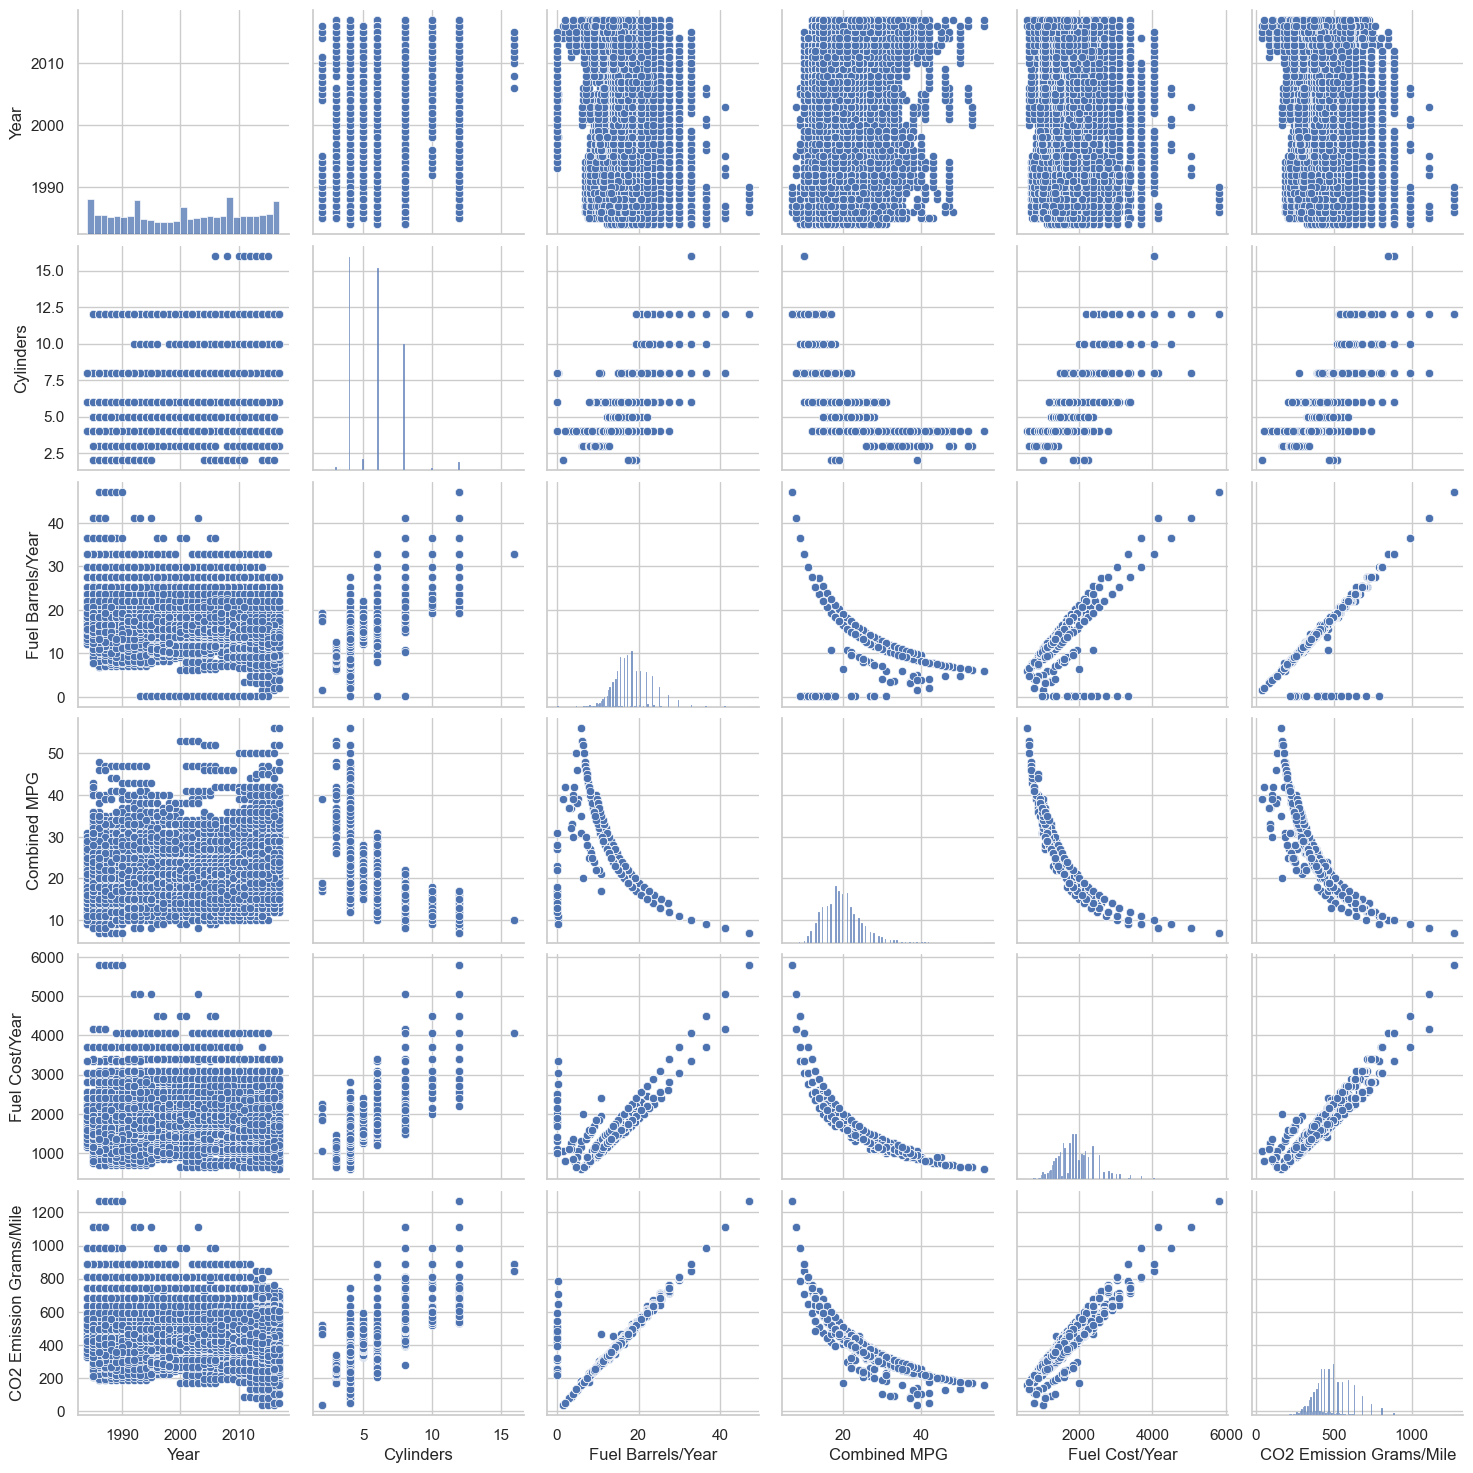

In [38]:
# Your response here: before we used simple regression, now multple
sns.pairplot(df2);

In [79]:


# Your response here. 
x = df2[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = df2[["CO2 Emission Grams/Mile"]]

model = LinearRegression().fit(x, y)
df2['Prediction'] = model.predict(x)

results = smf.ols("Prediction~ Year+Cylinders+df2['Fuel Barrels/Year']+df2['Combined MPG']+df2['Fuel Cost/Year']", data=df2).fit()
results.summary()



/var/folders/7s/v9wty4qj3t1cw493y3p29dbc0000gn/T/ipykernel_17644/1936030079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Prediction'] = model.predict(x)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Prediction   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.038e+29
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:13:17   Log-Likelihood:             8.4330e+05
No. Observations:               35952   AIC:                        -1.687e+06
Df Residuals:                   35946   BIC:                        -1.687e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  769.8883   1.85e-11   4.16e+13      0.000     769.888     769.888
Year                        -0.3206   9.27e-15  -3.46e+13      0.000      -0.321      -0.321
Cylinders                    1.8788   7.94e-14   2.37e+13      0.000       1.879       1.879
df2['Fuel Barrels/Year']    19.0529   5.84e-14   3.26e+14      0.000      19.053      19.053
df2['Combined MPG']         -3.0404   4.05e-14   -7.5e+13      0.000      -3.040      -3.040
df2['Fuel Cost/Year']        0.0323   4.61e-16   7.01e+13      0.000       0.032       0.032
==============================================================================
Omnibus:                     4772.487   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1293.410
Skew:                           0.137   Prob(JB):                    1.38e-281
Kurtosis:                       2.112   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

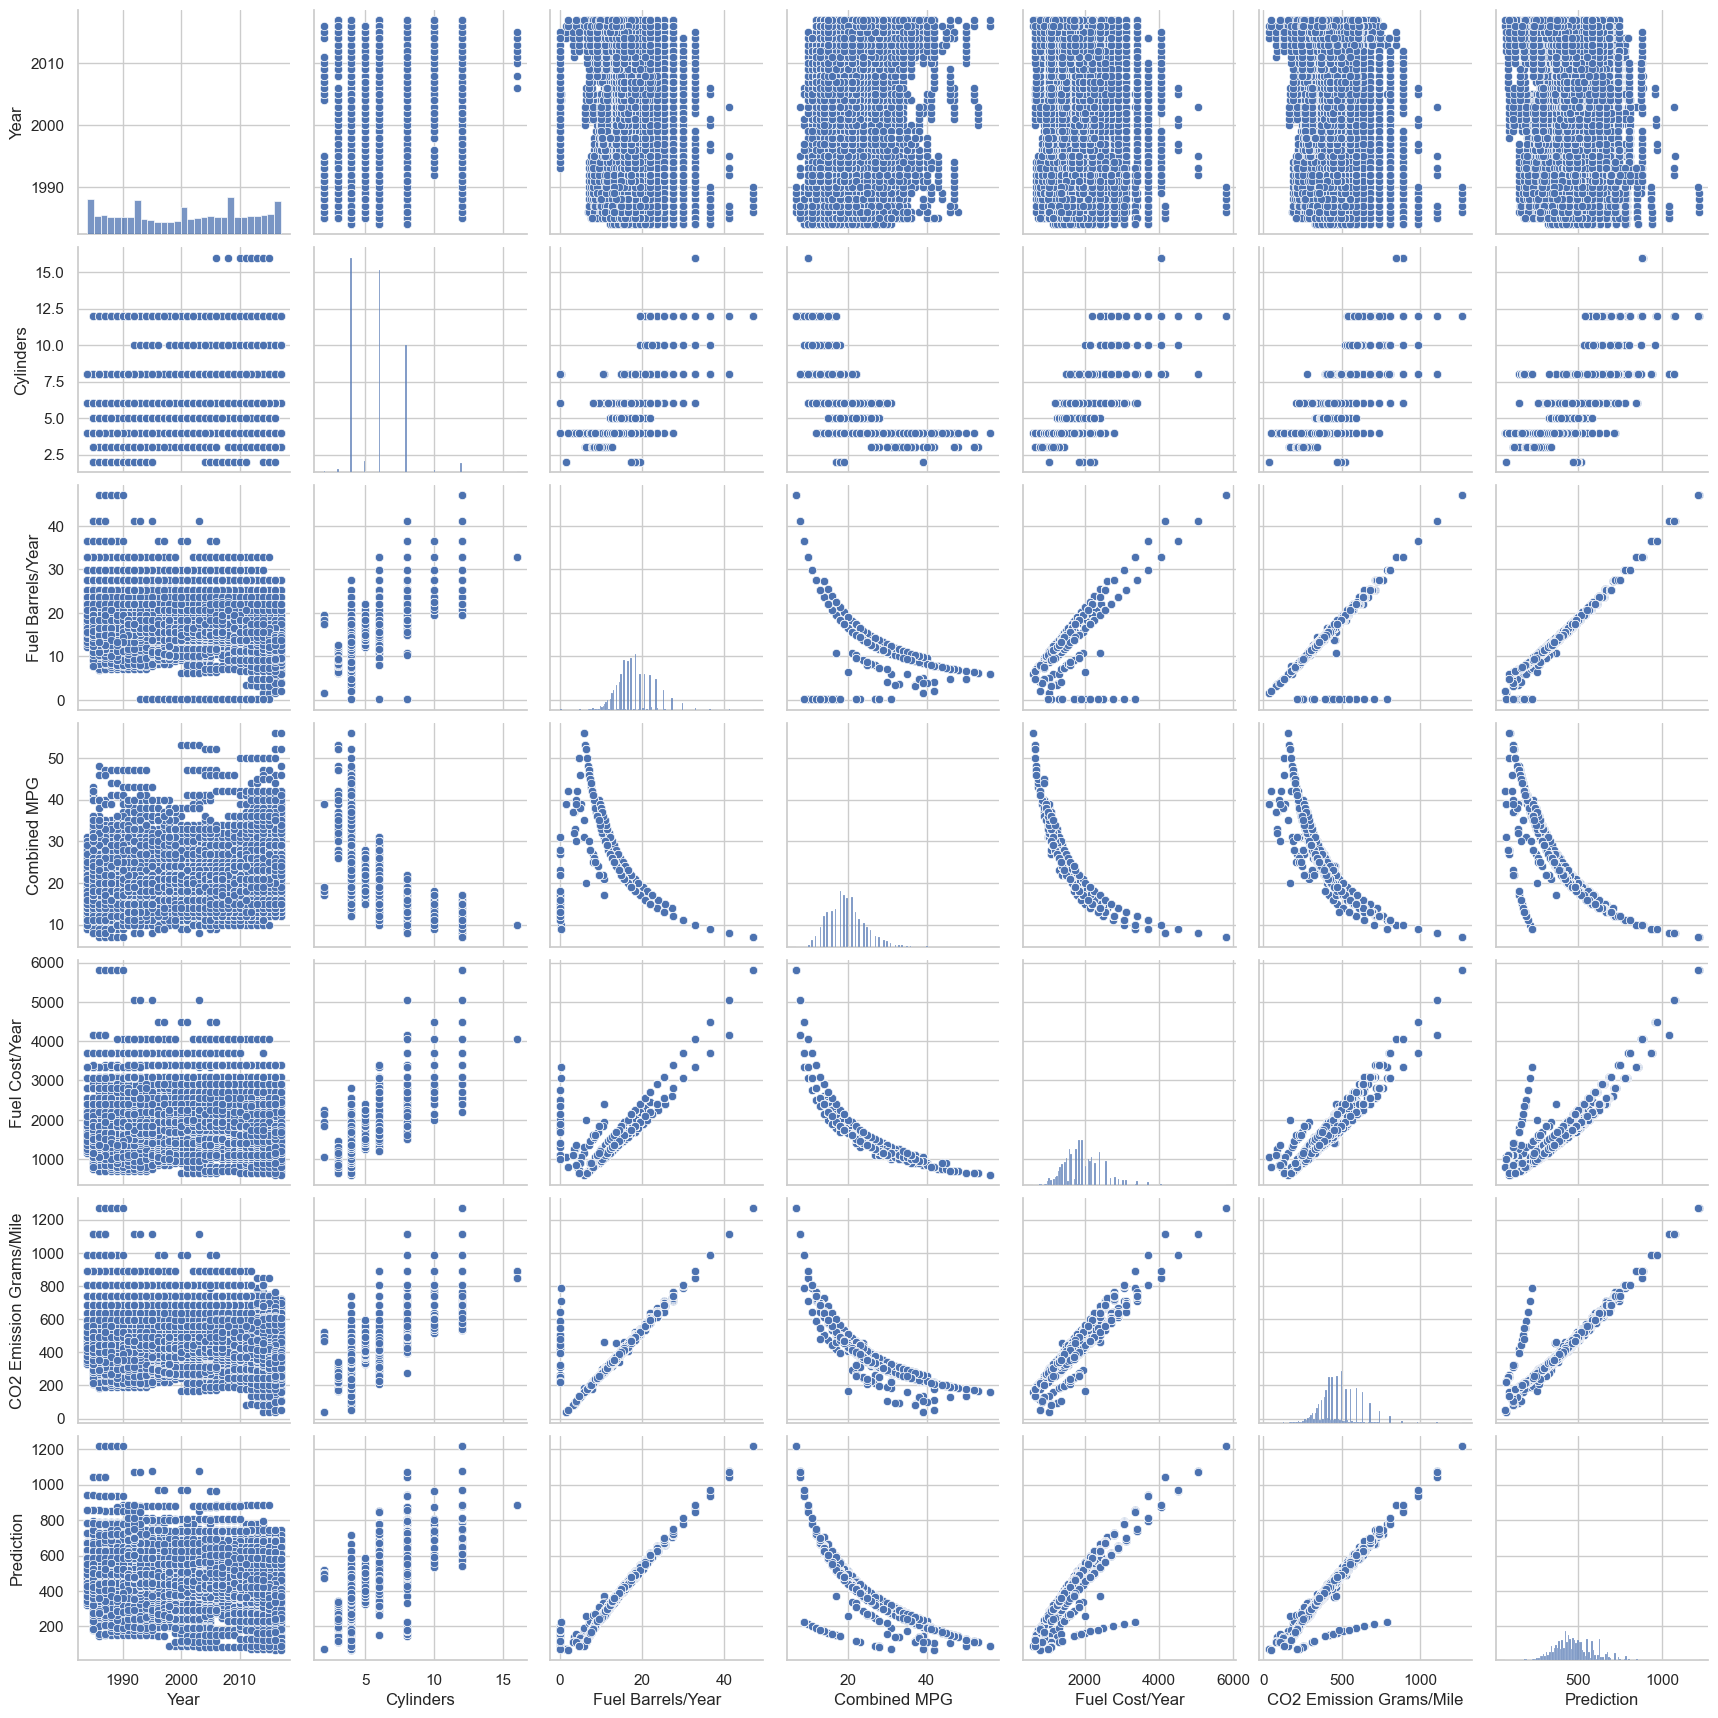

In [81]:
sns.pairplot(df2)
plt.show()


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [85]:
# Your code here. 
df3 = pd.DataFrame({'Invite': [1,3,4,6,8,9,11,14], 'Reject': [1,2,4,4,5,7,8,13]})

X = df3[["Invite"]]
Y= df3[["Reject"]]
model = LinearRegression().fit(X,Y)
df3["Prediction"] = model.predict(X)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

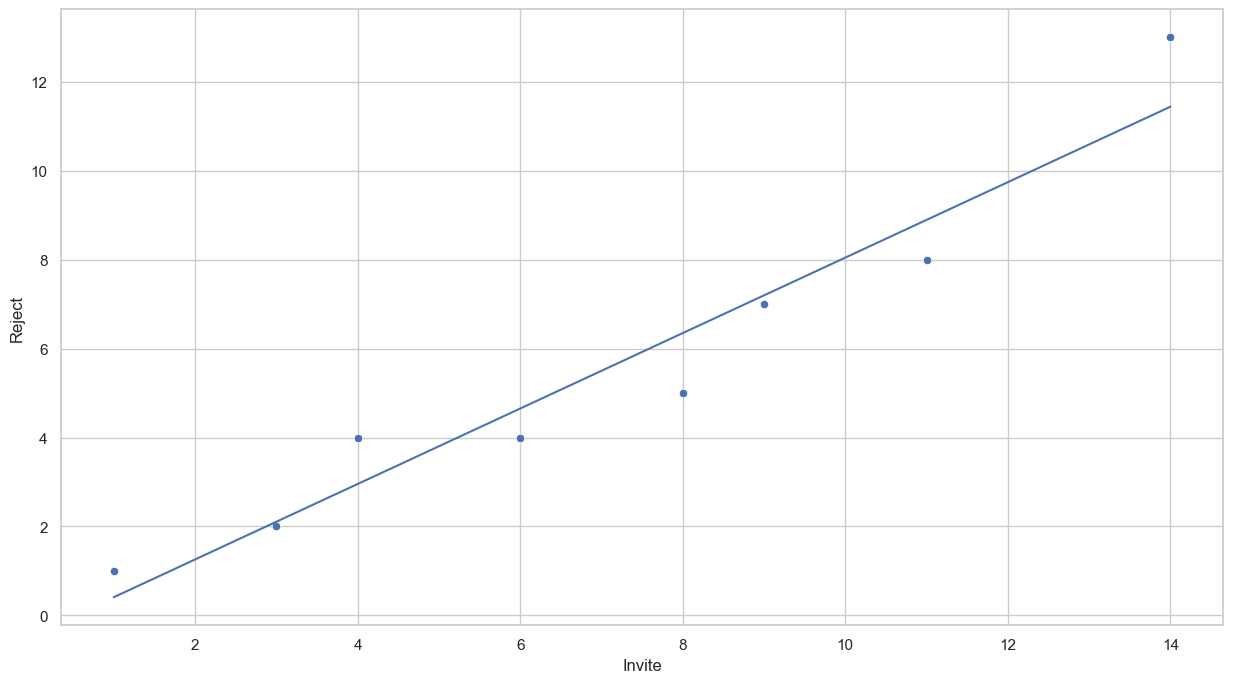

In [86]:
# Your code here.
sns.scatterplot(x=df3["Invite"],y= df3["Reject"])
plt.plot(df3.Invite, df3["Prediction"], color='b', label='reg.line')

<AxesSubplot:xlabel='Invite', ylabel='Reject'>

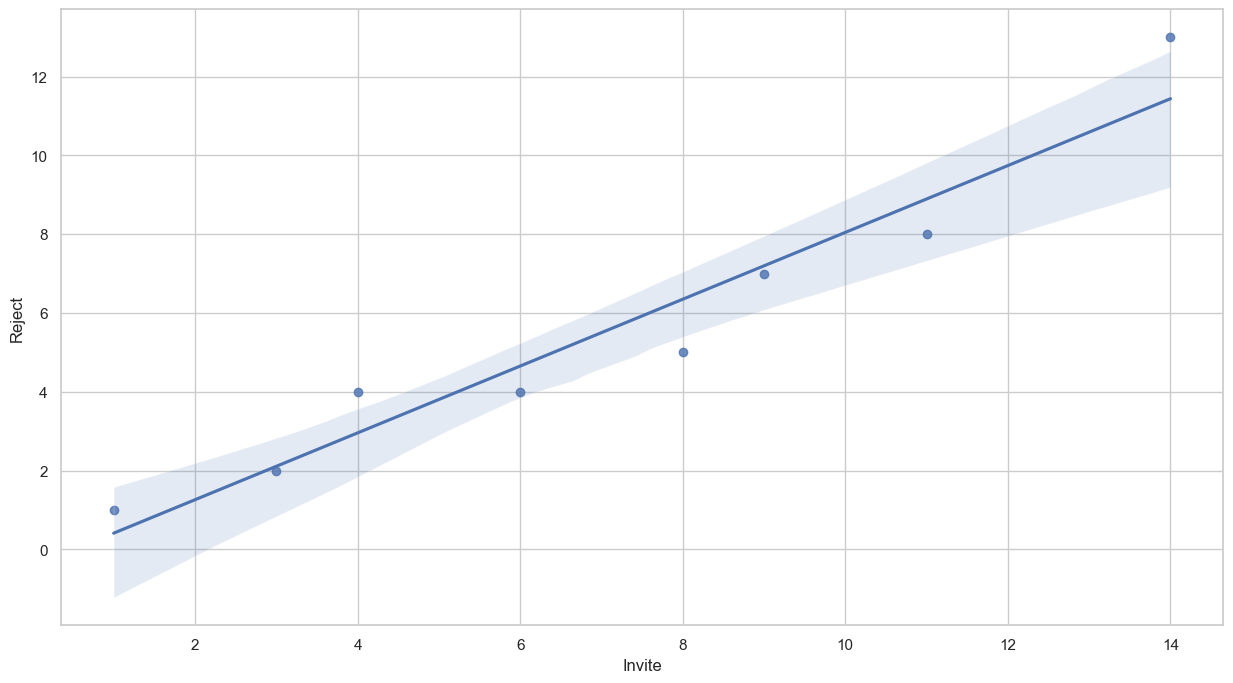

In [64]:
sns.regplot(x=df3["Invite"],y= df3["Reject"])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [65]:
# Your response here. 
results = smf.ols("Reject ~ Invite", data=df3).fit()
results.summary()

/Users/bernat/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Reject   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           0.000102
Time:                        16:31:57   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
Invite         0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# the more people I invite, the more people will be able to not come to the party, this is correct, but there is not 
# too much evidence, therefore Pvalue is high, and we can't guarantee this

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [87]:
# Your response here. 
# I remove outlier -> 4,4

df4 = pd.DataFrame({'Invite': [1,3,6,8,9,11,14], 'Reject': [1,2,4,5,7,8,13]})

X = df4[["Invite"]]
Y= df4[["Reject"]]
model = LinearRegression().fit(X,Y)
df4["Prediction"] = model.predict(X)

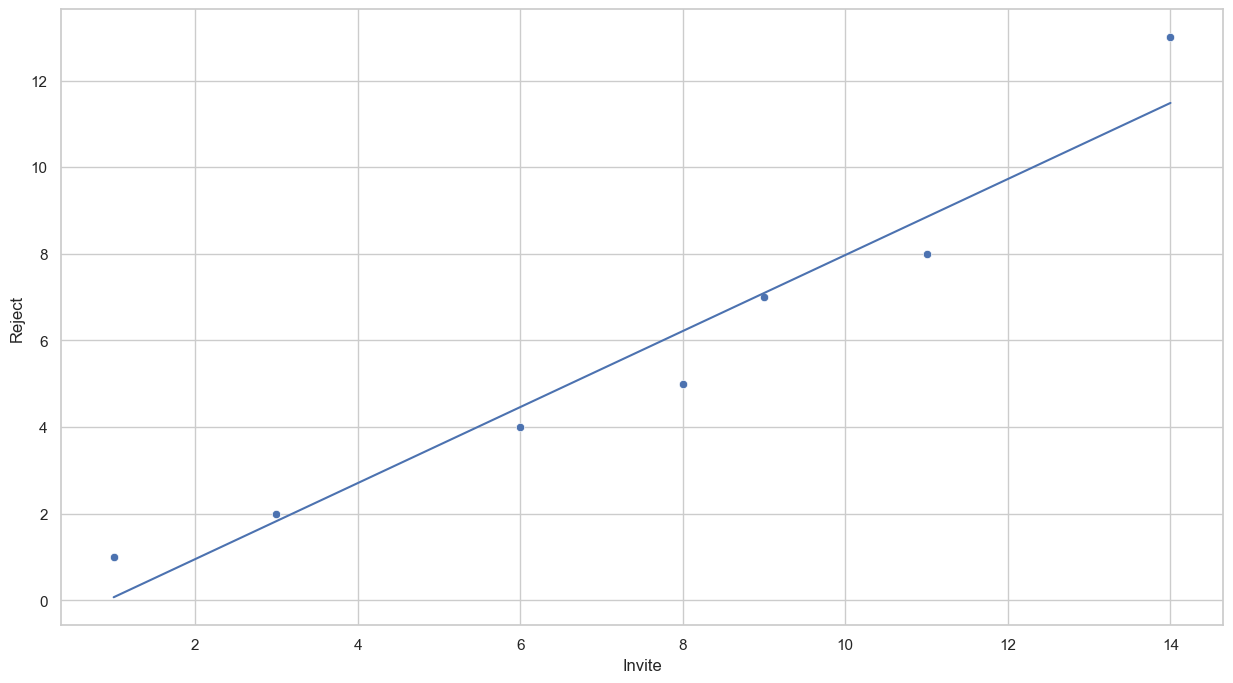

In [88]:
# Your code here.
sns.scatterplot(x=df4["Invite"],y= df4["Reject"])
plt.plot(df4.Invite, df4["Prediction"], color='b', label='reg.line')

In [72]:
# Your response here. 
results = smf.ols("Reject ~ Invite", data=df4).fit()
results.summary()

/Users/bernat/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Reject   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.54
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           0.000263
Time:                        16:35:25   Log-Likelihood:                -9.1609
No. Observations:                   7   AIC:                             22.32
Df Residuals:                       5   BIC:                             22.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8075      0.818     -0.987      0.369      -2.911       1.296
Invite         0.8779      0.096      9.140      0.000       0.631       1.125
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.598
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.468
Skew:                           0.355   Prob(JB):                        0.791
Kurtosis:                       1.951   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here.

#R2 is higher now, meaning that this model is more "trustable" together with the P-val, so by removing the outlier 
#we get a better aproximation.